In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

vacunados = pd.read_csv("D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/dataset_total_vacunas.csv")
type(vacunados)
print(len(vacunados))
pd.set_option("display.max.columns", None)
vacunados.head()

6387


,FECHA_ADMINISTRACION,GRUPO_ETARIO,GENERO,VACUNA,TIPO_EFECTOR,DOSIS_1,DOSIS_2,ID_CARGA
0,24FEB2021:00:00:00,31 a 40,F,AstraZeneca,Privado,1,0,NaN
1,24FEB2021:00:00:00,31 a 40,F,AstraZeneca,Público,12,0,NaN
2,24FEB2021:00:00:00,31 a 40,F,Sputnik,Privado,259,77,NaN
3,24FEB2021:00:00:00,31 a 40,F,Sputnik,Público,497,151,NaN
4,24FEB2021:00:00:00,31 a 40,F,Sputnik,Público nacional,38,19,NaN


In [5]:
vacunados.describe()

,DOSIS_1,DOSIS_2,ID_CARGA
count,6387.000000,6387.000000,0.0
mean,110.974949,32.627055,NaN
std,499.657750,235.698575,NaN
min,0.000000,0.000000,NaN
25%,1.000000,0.000000,NaN
50%,9.000000,0.000000,NaN
75%,49.000000,7.000000,NaN
max,10905.000000,8004.000000,NaN


In [4]:
vacunados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FECHA_ADMINISTRACION  6387 non-null   object 
 1   GRUPO_ETARIO          6387 non-null   object 
 2   GENERO                6387 non-null   object 
 3   VACUNA                6387 non-null   object 
 4   TIPO_EFECTOR          6387 non-null   object 
 5   DOSIS_1               6387 non-null   int64  
 6   DOSIS_2               6387 non-null   int64  
 7   ID_CARGA              0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 399.3+ KB


In [6]:
import numpy as np
vacunados.describe(include=object)

,FECHA_ADMINISTRACION,GRUPO_ETARIO,GENERO,VACUNA,TIPO_EFECTOR
count,6387,6387,6387,6387,6387
unique,133,8,2,3,3
top,20APR2021:00:00:00,51 a 60,F,Sputnik,Público
freq,93,935,3267,3914,3211


In [7]:
drugs = vacunados
drugs = drugs.replace('-', 0)
drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]] = drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]].astype('float')

comdrugs = pd.DataFrame(columns = ['Drug','Percentage of addicts'], index = range(0, 12))
comdrugs['Drug'] = drugs.columns.to_list()[4:28:2]
comdrugs['Drug'] = comdrugs['Drug'].apply(lambda x: x.split('-')[0])

per_adds = []
for i in drugs.columns.to_list()[4:28:2]:
    addicts = 0
    for k in range(len(drugs)):
        addicts += drugs['n'][k] * (drugs[i][k] * 0.01)
    per_adds.append(round((addicts / drugs['n'].sum()) * 100, 1)) 
    
comdrugs['Percentage of addicts'] = per_adds
comdrugs = comdrugs.sort_values('Percentage of addicts')
comdrugs['total'] = 100.0
comdrugs

ValueError: could not convert string to float: '31 a 40'

In [8]:
vacunados.shape
vacunados.columns

Index(['FECHA_ADMINISTRACION', 'GRUPO_ETARIO', 'GENERO', 'VACUNA',
       'TIPO_EFECTOR', 'DOSIS_1', 'DOSIS_2', 'ID_CARGA'],
      dtype='object')

In [9]:
pd.unique(vacunados['GRUPO_ETARIO'])

array(['31 a 40', '41 a 50', '51 a 60', '61 a 70', '71 a 80', '81 a 90',
       '91 o mas', '30 o menos'], dtype=object)

In [10]:
pd.unique(vacunados['VACUNA'])

array(['AstraZeneca', 'Sputnik', 'Sinopharm'], dtype=object)

In [11]:
pd.unique(vacunados['TIPO_EFECTOR'])

array(['Privado', 'Público', 'Público nacional'], dtype=object)

In [12]:
pd.unique(vacunados['GENERO'])

array(['F', 'M'], dtype=object)

In [13]:
vacunados['DOSIS_1'].describe()

count     6387.000000
mean       110.974949
std        499.657750
min          0.000000
25%          1.000000
50%          9.000000
75%         49.000000
max      10905.000000
Name: DOSIS_1, dtype: float64

In [14]:
groupVacuna = vacunados.groupby('VACUNA')
groupVacuna.describe()

DOSIS_1                                                         \
              count        mean         std  min  25%   50%   75%      max   
VACUNA                                                                       
AstraZeneca  1350.0  107.742222  460.397836  0.0  2.0   8.0  40.0  10281.0   
Sinopharm    1123.0  114.460374  457.707193  0.0  1.0   6.0  54.5   7033.0   
Sputnik      3914.0  111.089934  523.725524  0.0  1.0  10.0  50.0  10905.0   

            DOSIS_2                                                      \
              count       mean         std  min  25%  50%   75%     max   
VACUNA                                                                    
AstraZeneca  1350.0   0.130370    0.702138  0.0  0.0  0.0   0.0    16.0   
Sinopharm    1123.0  90.565450  532.236721  0.0  0.0  0.0   0.0  8004.0   
Sputnik      3914.0  27.212059   89.893403  0.0  0.0  2.0  19.0  2371.0   

            ID_CARGA                               
               count mean std min 25% 50% 75% max  
VACUNA                                             
AstraZeneca      0.0  NaN NaN NaN NaN NaN NaN NaN  
Sinopharm        0.0  NaN NaN NaN NaN NaN NaN NaN  
Sputnik          0.0  NaN NaN NaN NaN NaN NaN NaN

<AxesSubplot:xlabel='VACUNA'>

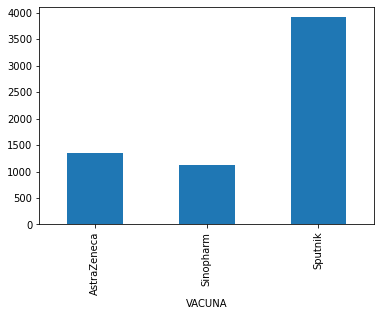

In [22]:
vacunasCount = groupVacuna["FECHA_ADMINISTRACION"].count()
vacunasCount.plot(kind="bar")

In [15]:
vacunasEdadesCount = vacunados.groupby("GRUPO_ETARIO")["FECHA_ADMINISTRACION"].count()
vacunasEdadesCount

GRUPO_ETARIO
30 o menos    845
31 a 40       918
41 a 50       903
51 a 60       935
61 a 70       856
71 a 80       776
81 a 90       640
91 o mas      514
Name: FECHA_ADMINISTRACION, dtype: int64

<AxesSubplot:xlabel='GRUPO_ETARIO'>

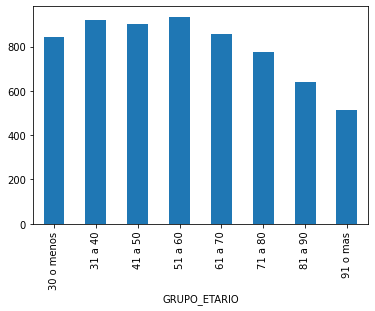

In [16]:
vacunasEdadesCount.plot(kind="bar")

In [19]:
groupGenero = vacunados.groupby('GENERO')
groupGenero.describe()

DOSIS_1                                                        DOSIS_2  \
         count        mean         std  min  25%   50%   75%      max   count   
GENERO                                                                          
F       3267.0  137.889807  569.382667  0.0  2.0  11.0  64.0  10905.0  3267.0   
M       3120.0   82.791987  412.471565  0.0  1.0   8.0  37.0   8714.0  3120.0   

                                                          ID_CARGA           \
             mean         std  min  25%  50%  75%     max    count mean std   
GENERO                                                                        
F       43.299969  290.899070  0.0  0.0  0.0  9.0  8004.0      0.0  NaN NaN   
M       21.451282  157.762209  0.0  0.0  0.0  6.0  5664.0      0.0  NaN NaN   

                            
       min 25% 50% 75% max  
GENERO                      
F      NaN NaN NaN NaN NaN  
M      NaN NaN NaN NaN NaN

In [29]:
d = {'hombres' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 'mujeres' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


<AxesSubplot:title={'center':'The title of my graph'}>

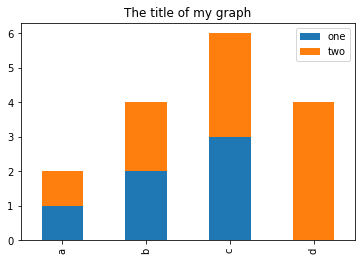

In [30]:
# Plot stacked data so columns 'one' and 'two' are stacked
my_df = pd.DataFrame(d)
my_df.plot(kind='bar', stacked=True, title="The title of my graph")

Text(0.5, 0, 'Edad')

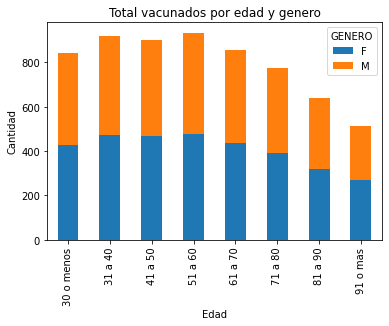

In [17]:
by_edad_sexo = vacunados.groupby(["GRUPO_ETARIO", "GENERO"])
edad_sexo_count = by_edad_sexo["FECHA_ADMINISTRACION"].count()
edadSexo_unstacked = edad_sexo_count.unstack()
s_plot = edadSexo_unstacked.plot(kind='bar', stacked=True, title="Total vacunados por edad y genero")
s_plot.set_ylabel("Cantidad")
s_plot.set_xlabel("Edad")